In [2]:
%matplotlib notebook

### Loading modules

First of all, we need to load the modules required for the analysis to the enviroment.

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="whitegrid", color_codes=True)

### Loading the data
The dataset of interest was downloaded from [OpenML](https://www.openml.org/d/55) as a **comma separated value** file and uploaded to the jupyter enviroment. Now, we use **pandas** to load the data into a dataframe.

In [89]:
hepatitis_data = pd.read_csv("dataset_55_hepatitis.csv")

### Understanding and preparing the dataset

We can take a look at the dataset that we've just loaded by using the `head` command.

In [90]:
hepatitis_data.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,30,male,no,no,no,no,no,no,no,no,no,no,no,1,85,18,4,?,no,LIVE
1,50,female,no,no,yes,no,no,no,no,no,no,no,no,0.9,135,42,3.5,?,no,LIVE
2,78,female,yes,no,yes,no,no,yes,no,no,no,no,no,0.7,96,32,4,?,no,LIVE
3,31,female,?,yes,no,no,no,yes,no,no,no,no,no,0.7,46,52,4,80,no,LIVE
4,34,female,yes,no,no,no,no,yes,no,no,no,no,no,1,?,200,4,?,no,LIVE


As we can see above, there are missing values identified with the '?' symbol and most of the data is not numerical. We can check this by using `dtypes` function

In [91]:
hepatitis_data.dtypes

AGE                 int64
SEX                object
STEROID            object
ANTIVIRALS         object
FATIGUE            object
MALAISE            object
ANOREXIA           object
LIVER_BIG          object
LIVER_FIRM         object
SPLEEN_PALPABLE    object
SPIDERS            object
ASCITES            object
VARICES            object
BILIRUBIN          object
ALK_PHOSPHATE      object
SGOT               object
ALBUMIN            object
PROTIME            object
HISTOLOGY          object
Class              object
dtype: object

Before proceding, we can also check the `shape` of our dataframe. As we can see below, the dataset has 155 rows corresponding to the number of patients included in this study, and 20 columns, corresponding to the features or characteristics collected for each patient.

In [92]:
hepatitis_data.shape

(155, 20)

Because for machine learning algorithms, it is requiered to have numerical data, we will convert categorical data as 'no', 'yes', 'DIE', 'LIVE' into numerical categories. We will use for this task, the function `replace`

In [93]:
#Replace yes, no, die, live, female, male and ? for numerical values or np.nan
replacements = {'no': 0,
               'yes': 1,
               'DIE': 0,
               'LIVE': 1,
               '?': np.nan,
               'female': 0,
               'male': 1}

hepatitis_data.replace(replacements, inplace = True)

Lastly, we will convert all of our columns in the dataset to **float** type.`

In [94]:
hepatitis_data = hepatitis_data.astype(float)

We need to see how the different classes of survival are represented in the dataset. (Class imbalance)

In [95]:
total_of_patients = hepatitis_data.shape[0]
total_of_live_patients = (np.sum(hepatitis_data['Class'] == 1)/total_of_patients)*100
total_of_dead_patients = (np.sum(hepatitis_data['Class'] == 0)/total_of_patients)*100
print("Living patients:", round(total_of_live_patients,2),"%")
print("Dead patients:", round(total_of_dead_patients,2),"%")

Living patients: 79.35 %
Dead patients: 20.65 %


### Exploratory Analysis

In [88]:
hepatitis_data.describe()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
count,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,144.000000,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000,155.000000
mean,41.200000,0.103226,0.506494,0.154839,0.649351,0.396104,0.207792,0.827586,0.416667,0.20000,0.340000,0.133333,0.12000,1.427517,105.325397,85.89404,3.817266,61.852273,0.451613,0.793548
std,12.565878,0.305240,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,0.494727,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499266,0.406070
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.300000,26.000000,14.00000,2.100000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.700000,74.250000,31.50000,3.400000,46.000000,0.000000,1.000000
50%,39.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.00000,1.000000,85.000000,58.00000,4.000000,61.000000,0.000000,1.000000
75%,50.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.00000,1.000000,0.000000,0.00000,1.500000,132.250000,100.50000,4.200000,76.250000,1.000000,1.000000
max,78.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,8.000000,295.000000,648.00000,6.400000,100.000000,1.000000,1.000000


In [125]:
interesting_variables = ['AGE', 'SEX', 'LIVER_BIG', 'PROTIME', 'ASCITES', 'SGOT','ALK_PHOSPHATE', 'Class']
hepatitis_analysis = hepatitis_data[interesting_variables].dropna()

<IPython.core.display.Javascript object>


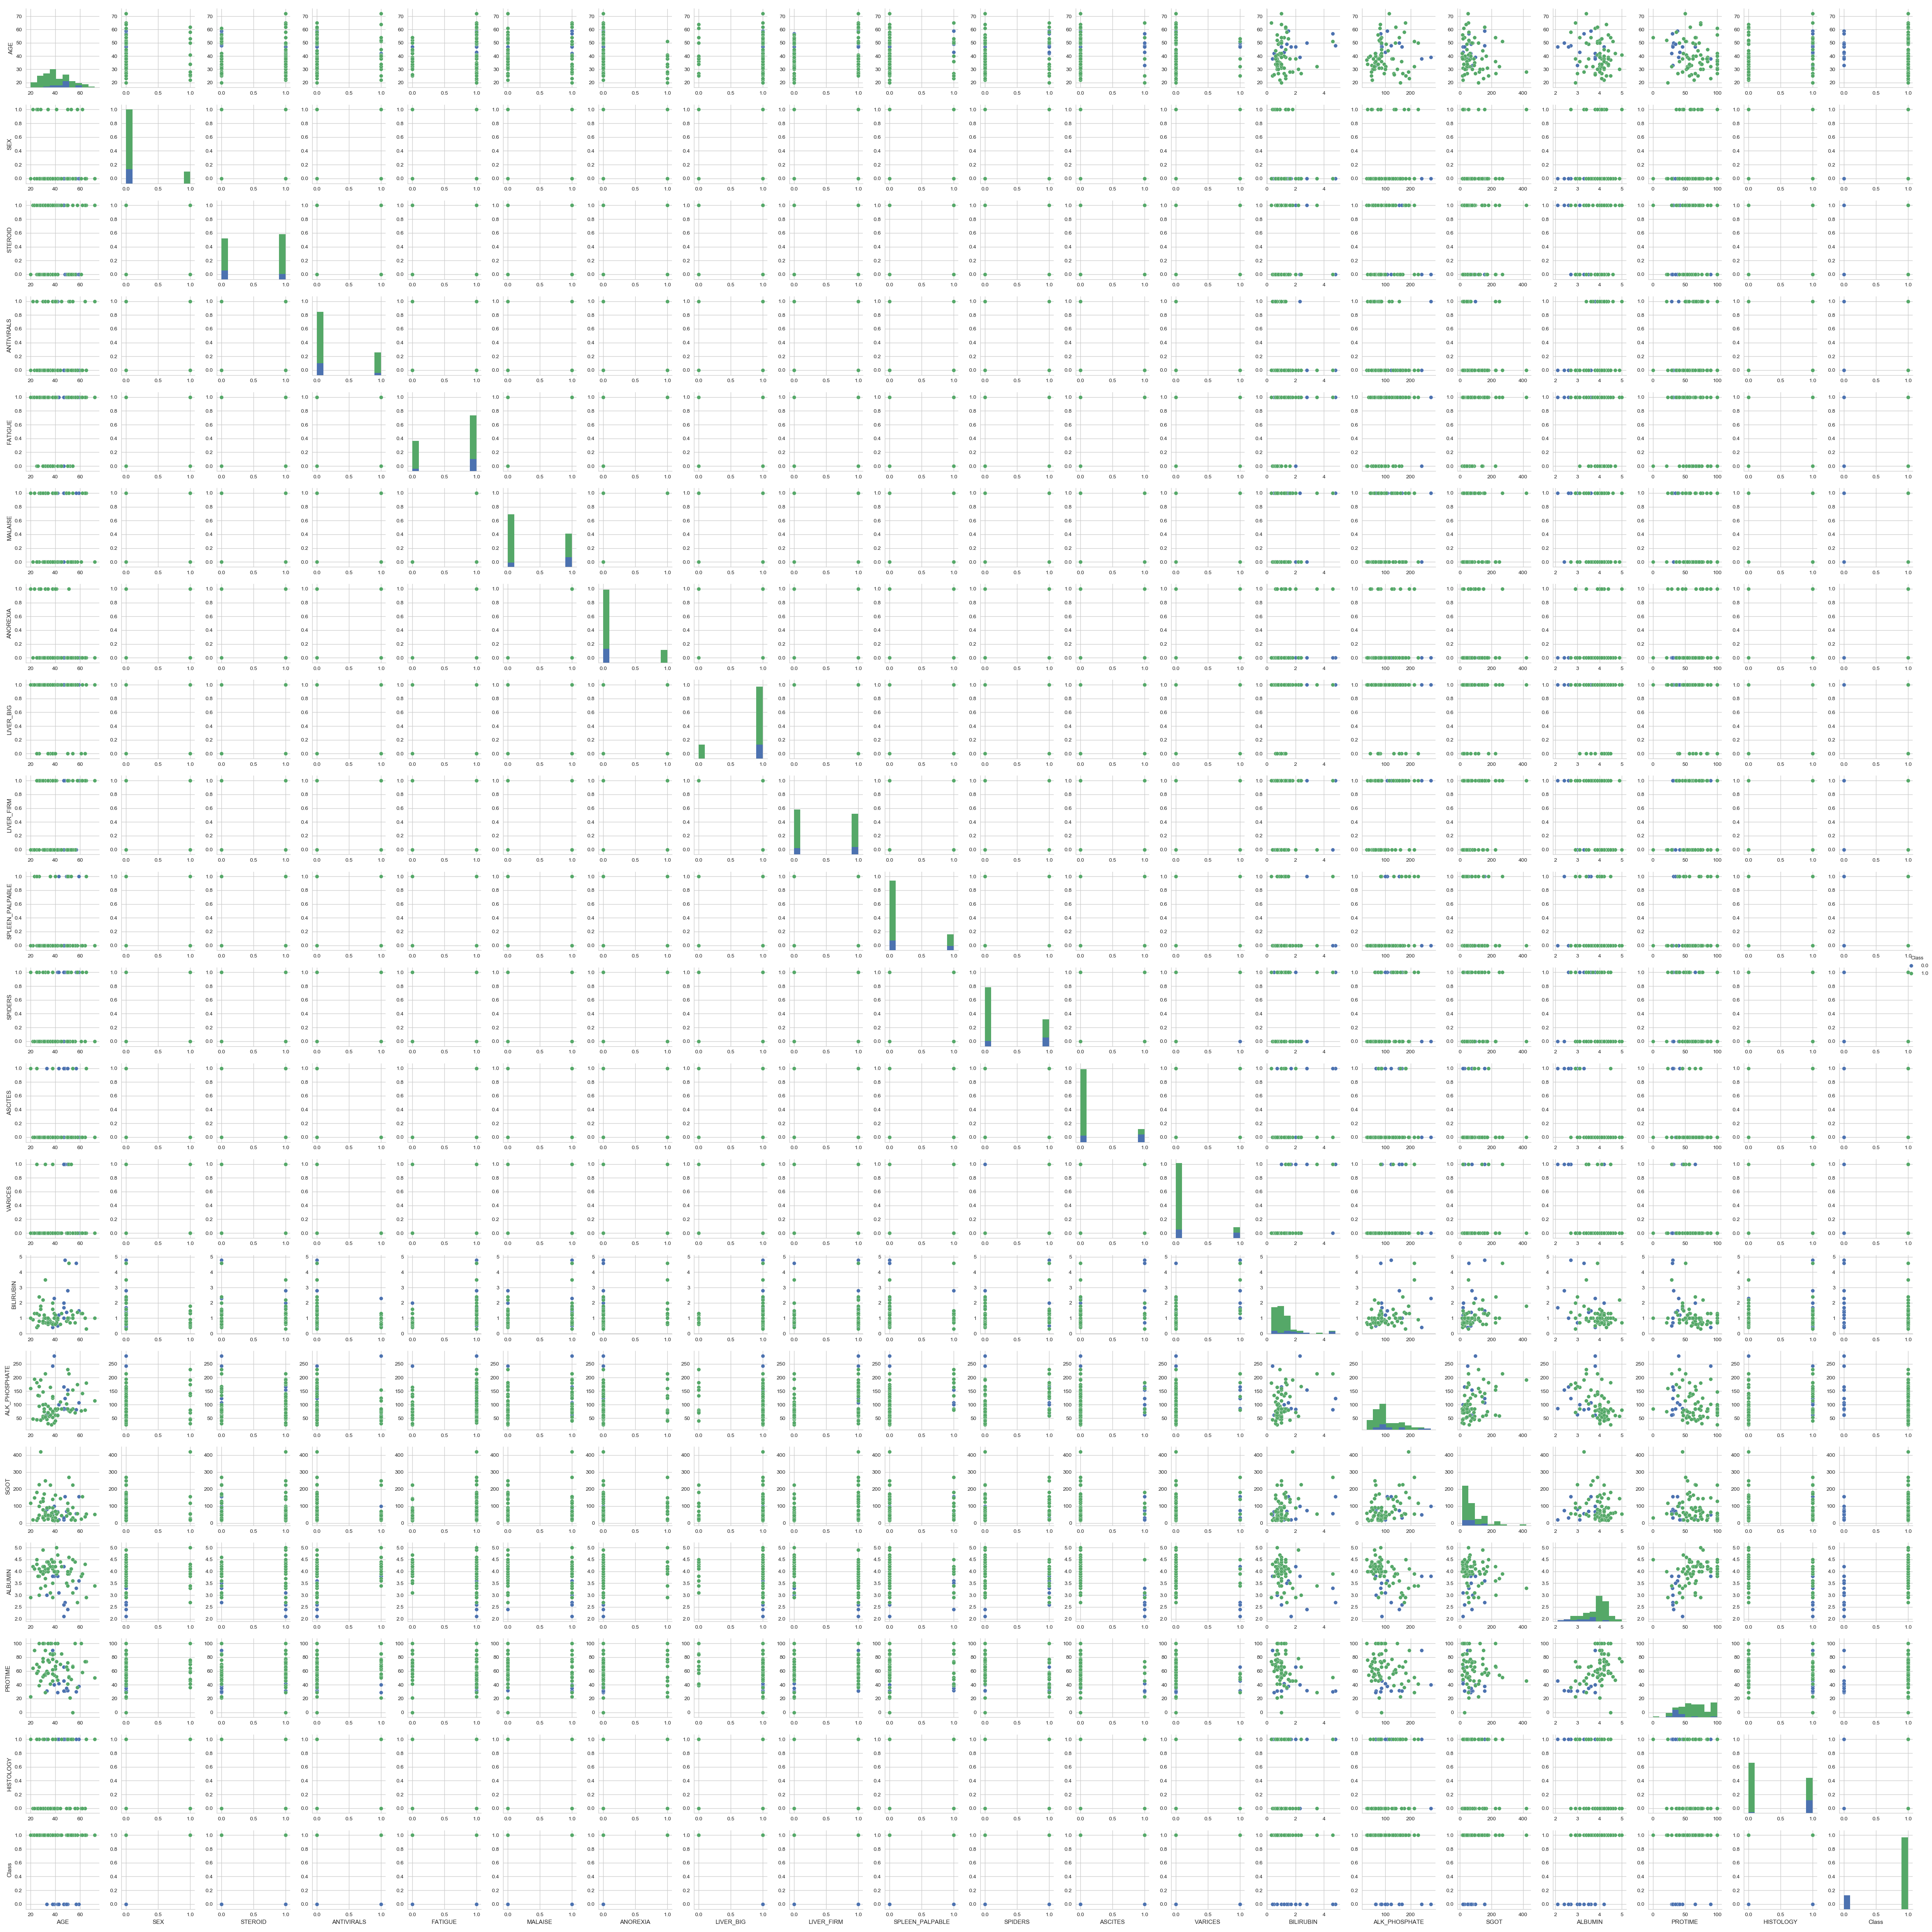

In [127]:
hepatitis_analysis_2 = hepatitis_data.dropna()
sns.pairplot(hepatitis_analysis_2, hue = "Class")